<a href="https://colab.research.google.com/github/laviniaflorentina/neural_networks_dissertation/blob/master/experiment0_baseline_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloads

In [0]:
import os.path
from IPython.display import clear_output

if not os.path.exists("data/train_minist.npz"):
  !wget https://github.com/laviniaflorentina/neural_networks_dissertation/raw/master/data/train_minist.npz
  clear_output(wait=True)

if not os.path.exists("validation_minist.npz"):
  !wget https://github.com/laviniaflorentina/neural_networks_dissertation/raw/master/data/validation_minist.npz
  clear_output(wait=True)

if not os.path.exists("test_minist.npz"):
  !wget https://github.com/laviniaflorentina/neural_networks_dissertation/raw/master/data/test_minist.npz
  clear_output(wait=True)

!ls

sample_data  test_minist.npz  train_minist.npz	validation_minist.npz


### Imports

In [0]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pandas as pd
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator



def plot_train(train_history, train=True, validation=True, acc_name='Model accuracy', loss_name='Model loss'):
  legend = []
  
  fig, ax = plt.subplots()
  
  fig.tight_layout()
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  #fig.savefig(acc_name+".png", dpi=100)
  
  # summarize history for accuracy
  if train:
    plt.plot(history.history['acc'])
    legend.append('train')
    
  if validation:
    plt.plot(history.history['val_acc'])
    legend.append('validation')
    
  plt.grid()
  plt.title(acc_name)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(legend, loc='upper left')
  plt.xticks((np.arange(len(history.history["acc"]))), 
             (np.arange(len(history.history["acc"]))+1))
  plt.show()
  
  fig.tight_layout()
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  #fig.savefig(loss_name+".png", dpi=100)
  
  legend = []
  
  # summarize history for loss
  if train:
    plt.plot(history.history['loss'])
    legend.append('train')
    
  if validation:
    plt.plot(history.history['val_loss'])
    legend.append('validation')
    
  plt.grid()
  plt.title(loss_name)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(legend, loc='upper left')
  plt.xticks((np.arange(len(history.history["acc"]))), 
             (np.arange(len(history.history["acc"]))+1))
  plt.show()
  
  return



def global_evaluation(true_labels, predicted_labels, avg='macro'):
  f1 = f1_score(true_labels, predicted_labels, average=avg)
  precision = precision_score(true_labels, predicted_labels, average=avg)
  recall = recall_score(true_labels, predicted_labels, average=avg)
  accuracy = accuracy_score(true_labels, predicted_labels)
  
  evaluation_table = pd.DataFrame({'Metric':["F1-score", "Precision", "Recall", "Accuracy"], "Value":[f1, precision, recall, accuracy] })
  
  return evaluation_table



def micro_evaluation(true_labels, predicted_labels, labels=list(range(10)), avg=None):
  f1 = f1_score(true_labels, predicted_labels, average=avg)
  precision = precision_score(true_labels, predicted_labels, average=avg)
  recall = recall_score(true_labels, predicted_labels, average=avg)
  evaluation_table = pd.DataFrame({'Labels':labels, "precision":precision, "recall":recall, "f1":f1 })
  
  return evaluation_table




def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                         image="confusion_matrix.png"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig(image, dpi=100)
    return ax

Using TensorFlow backend.


### Load Data

In [0]:
npzfile = np.load("train_minist.npz")
X_train = npzfile['arr_0']
y_train = npzfile['arr_1']

npzfile = np.load("validation_minist.npz")
X_validation = npzfile['arr_0']
y_validation = npzfile['arr_1']

npzfile = np.load("test_minist.npz")
X_test = npzfile['arr_0']
y_test = npzfile['arr_1']

print("Train",X_train.shape)
print("Valid",X_validation.shape)
print("Test ",X_test.shape)

Train (3000, 28, 28)
Valid (3000, 28, 28)
Test  (10000, 28, 28)


#### Sample

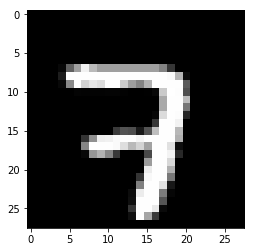

7


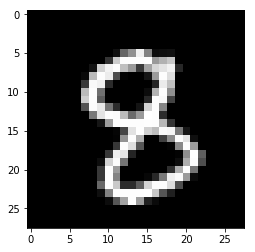

8


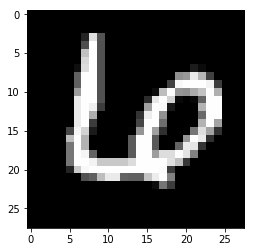

6


In [0]:
i = random.randint(0, len(X_train))
# plot image
plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()
# label
print(y_train[i])

# plot image
plt.imshow(X_validation[i], cmap=plt.get_cmap('gray'))
plt.show()
# label
print(y_validation[i])

# plot image
plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
plt.show()
# label
print(y_test[i])

### Baseline CNN

Train on 3000 samples, validate on 3000 samples
Epoch 1/20
3000/3000 [==============================] - 0s 120us/step - loss: 1.8413 - acc: 0.5853 - val_loss: 0.6425 - val_acc: 0.8230
Epoch 2/20
3000/3000 [==============================] - 0s 33us/step - loss: 0.4764 - acc: 0.8717 - val_loss: 0.4357 - val_acc: 0.8737
Epoch 3/20
3000/3000 [==============================] - 0s 30us/step - loss: 0.3246 - acc: 0.9143 - val_loss: 0.3774 - val_acc: 0.8917
Epoch 4/20
3000/3000 [==============================] - 0s 28us/step - loss: 0.2655 - acc: 0.9293 - val_loss: 0.3468 - val_acc: 0.8997
Epoch 5/20
3000/3000 [==============================] - 0s 27us/step - loss: 0.2121 - acc: 0.9470 - val_loss: 0.3298 - val_acc: 0.9043
Epoch 6/20
3000/3000 [==============================] - 0s 29us/step - loss: 0.1772 - acc: 0.9617 - val_loss: 0.3168 - val_acc: 0.9147
Epoch 7/20
3000/3000 [==============================] - 0s 27us/step - loss: 0.1470 - acc: 0.9707 - val_loss: 0.3106 - val_acc: 0.9117
Epoch 

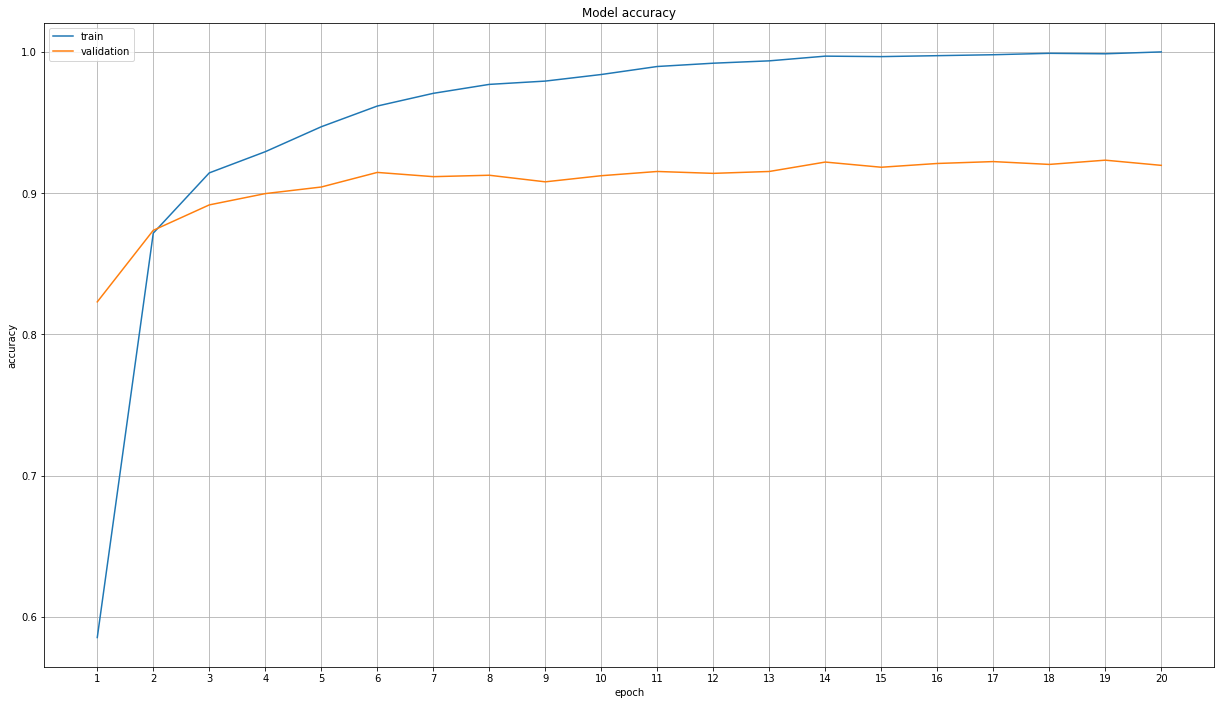

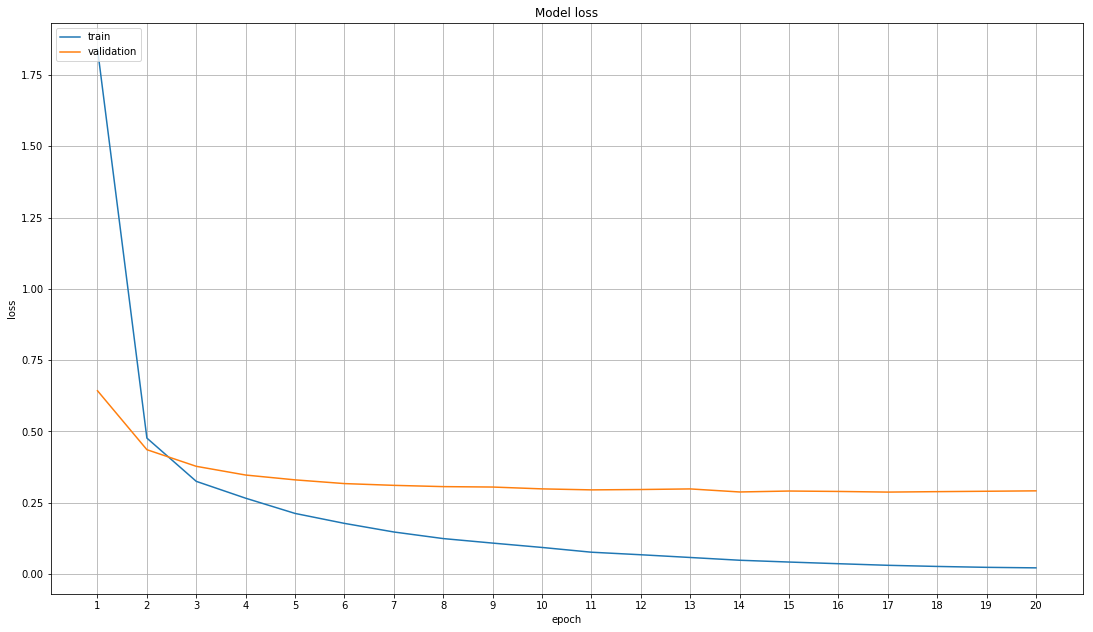

Confusion matrix, without normalization
[[ 950    0    1    2    1    3   18    1    4    0]
 [   0 1122    2    2    2    1    3    0    3    0]
 [   8    6  931   21   17    2   12   19   14    2]
 [   4    3   21  911    1   23    2   19   18    8]
 [   3    7    5    0  918    0    9    2    7   31]
 [  10    2    3   20    7  805   18    6   16    5]
 [  12    4    5    2   11   20  897    2    5    0]
 [   0   13   23    4    9    0    0  953    4   22]
 [   5    4   10   11    9   28    9   13  873   12]
 [  12    8    3    9   33    5    1   21    3  914]]
Normalized confusion matrix
[[9.69387755e-01 0.00000000e+00 1.02040816e-03 2.04081633e-03
  1.02040816e-03 3.06122449e-03 1.83673469e-02 1.02040816e-03
  4.08163265e-03 0.00000000e+00]
 [0.00000000e+00 9.88546256e-01 1.76211454e-03 1.76211454e-03
  1.76211454e-03 8.81057269e-04 2.64317181e-03 0.00000000e+00
  2.64317181e-03 0.00000000e+00]
 [7.75193798e-03 5.81395349e-03 9.02131783e-01 2.03488372e-02
  1.64728682e-02 1.937984

,Metric,Value
0,F1-score,0.926440
1,Precision,0.926622
2,Recall,0.926486
3,Accuracy,0.927400


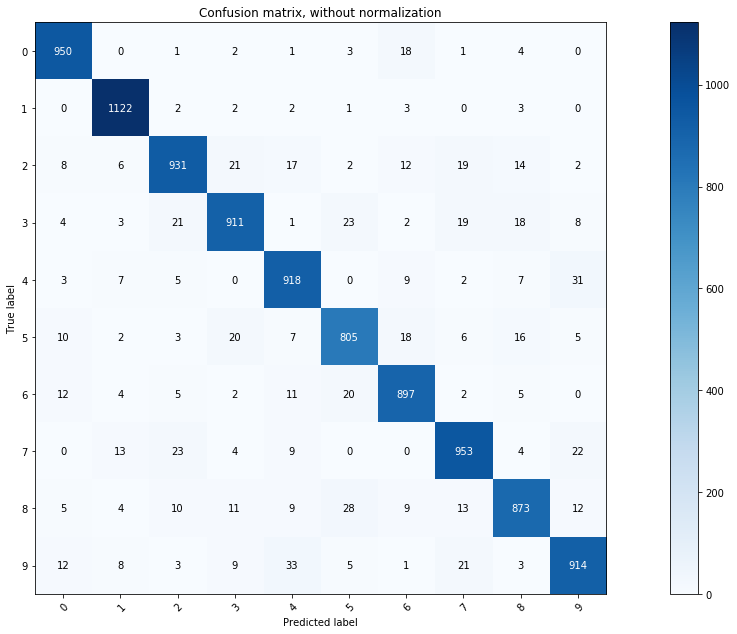

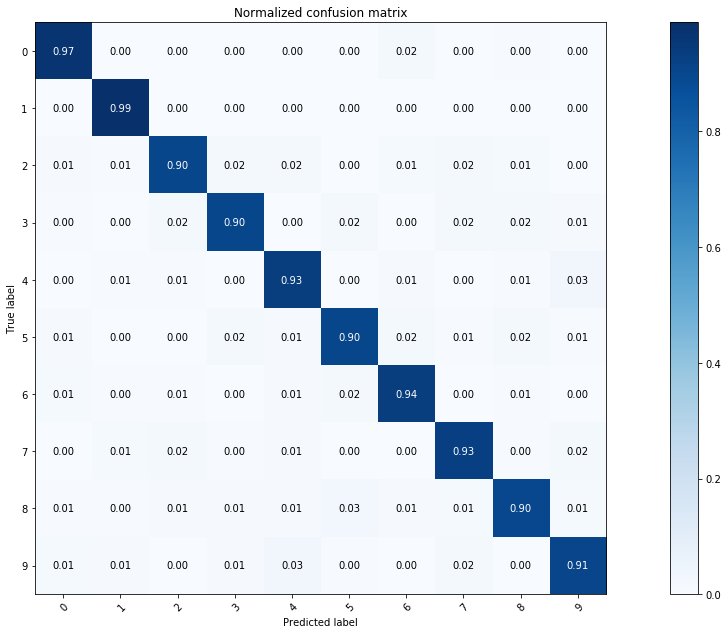

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
import random
from IPython.display import Image
from keras.utils.vis_utils import plot_model


K.set_image_data_format('channels_first')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


def scale_data(images, labels, number_classes=100):
  # flatten 28*28 images to a 784 vector for each image
  # luam fiecare imagine si o strivim intr-un vector
  num_pixels = images.shape[-2] * images.shape[-1]
  scaled_images = images.reshape(images.shape[0], num_pixels).astype('float32')
  
  # normalize inputs from 0-255 to 0-1
  # importantfor NN - learn faster
  scaled_images = scaled_images / 255

  # one hot encode outputs
  scaled_labels = np_utils.to_categorical(labels, num_classes=number_classes)
  
  return scaled_images, scaled_labels


X_train_sc, y_train_sc = scale_data(images=X_train, labels=y_train)
X_valid_sc, y_valid_sc = scale_data(images=X_validation, labels=y_validation)
X_test_sc, _ = scale_data(images=X_test, labels=y_test)

# create model
model = Sequential()
model.add(Dense(X_train_sc.shape[-1], input_dim=X_train_sc.shape[-1], kernel_initializer='normal', activation='relu'))
model.add(Dense(y_train_sc.shape[-1], kernel_initializer='normal', activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

history = model.fit(X_train_sc, y_train_sc, validation_data=(X_valid_sc, y_valid_sc), epochs=20, batch_size=200, verbose=1)

# plot history training
plot_train(train_history=history, 
           train=True, 
           validation=True)

# predicitons
y_predicted = model.predict_classes(X_test_sc)

plot_confusion_matrix(y_test, y_predicted, classes=np.array(range(10)), normalize=False, image="baseline_nn_confusion_matrix_notnormalized.png")

plot_confusion_matrix(y_test, y_predicted, classes=np.array(range(10)), normalize=True, image="baseline_nn_confusion_matrix_normalized.png")

baseline_nn_global_evaluation = global_evaluation(y_test, y_predicted)

baseline_nn_global_evaluation.to_csv("baseline_nn_global_evaluation.csv")

baseline_nn_global_evaluation

In [0]:
baseline_nn_micro_evaluation = micro_evaluation(y_test, y_predicted)

baseline_nn_micro_evaluation.to_csv("baseline_nn_micro_evaluation.csv")

baseline_nn_micro_evaluation

,Labels,precision,recall,f1
0,0,0.946215,0.969388,0.957661
1,1,0.959795,0.988546,0.973958
2,2,0.927291,0.902132,0.914538
3,3,0.927699,0.901980,0.914659
4,4,0.910714,0.934827,0.922613
5,5,0.907554,0.902466,0.905003
6,6,0.925697,0.936326,0.930981
7,7,0.919884,0.927043,0.923450
8,8,0.921859,0.896304,0.908902
9,9,0.919517,0.905847,0.912631


### Model diagram

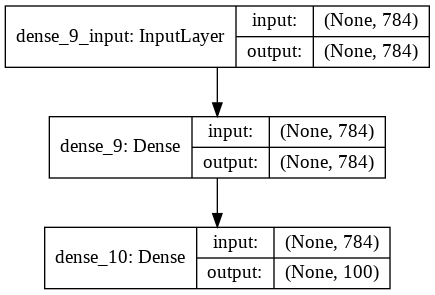

In [0]:
# image model
plot_model(model, to_file='baseline_nn_model.png', show_shapes=True, show_layer_names=True)
Image('baseline_nn_model.png')